In [251]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate # Importing scipy.integrate.solve_ivp method
from numba import jit

%matplotlib inline

newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams) # Updates the parametere set above. 

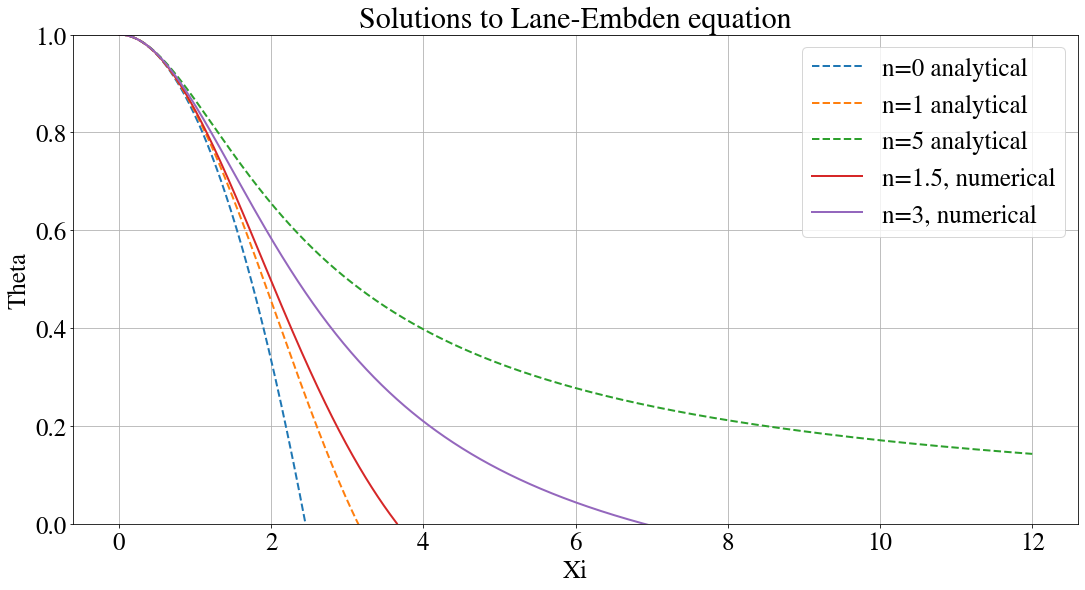

In [258]:
@jit(nopython=True)
def f_vector(xi,w,n): #f vektoren lik [omega(t), theta''(t)]^T
    k = -2*w[1]/xi - w[0]**n   #dobbeltderivert av theta, derivert av "omega"
    f = np.zeros(2)
    f[0] = w[1]
    f[1] = k
    return f

@jit(nopython=True)
def RK4(w0,f,dt,n,xi_end=10): #w0 = startbet., f = spesiell vektorfuksjon(derivert),dt = steglengde, xi_end = siste "t-verdi"
    xi = np.linspace(0.0001, xi_end, int(xi_end/dt)+1) #grid for xi verdier. Må ha xi_0 != 0 for å unngå å dele på 0 i f_vec
    w = np.zeros((len(xi),len(w0))) #array som lagrer utregnede verdier
    w[0] = w0 #setter startverdi

    
    for i in range(len(xi)-1): #RK4 metode
        k_1 = f(xi[i],w[i],n)
#         if i==0:
#             print('k1=',k_1)
        k_2 = f(xi[i]+dt/2,w[i]+dt*k_1/2,n)
        k_3 = f(xi[i]+dt/2,w[i]+dt*k_2/2,n)
        k_4 = f(xi[i]+dt,w[i]+dt*k_3,n)

        w[i+1] = w[i]+(dt/6)*(k_1+2*k_2+2*k_3+k_4)
    return xi,w #returnerer t verdier og w vektor verdier

start_w0 = np.array([1,0]) #initial conditions for the Lane-Embden equations. theta_0 = 1 and dtheta_0 = ????
# xi,w_n0 = RK4(start_w0,f_vector,0.1,0,6.5)
# xi,w_n1 = RK4(start_w0,f_vector,0.1,1,6.5)
xi,w_n15 = RK4(start_w0,f_vector,0.01,1.5,12)
xi,w_n3 = RK4(start_w0,f_vector,0.01,3,12)

# print('w=',np.shape(w_n0))
# theta_n0 = np.zeros(len(w_n0))
# theta_n1 = np.zeros(len(w_n1))
theta_n15 = w_n15[0:,0]
theta_n3 = w_n3[0:,0]

@jit(nopython=True)
def analytical_solution_n0(xi):
    return 1- 1/6 * xi**2

@jit(nopython=True)
def analytical_solution_n1(xi):
    return np.sin(xi)/xi

@jit(nopython=True)
def analytical_solution_n5(xi):
    return 1/np.sqrt(1+xi**2/3)

analytical_solution_n1_arr = np.zeros(len(xi))
for i in range(len(xi)):
    if xi[i] < 5:
        analytical_solution_n1_arr[i] = analytical_solution_n1(xi[i])
    else:
        analytical_solution_n1_arr[i] = 0
        
    
        

    
plt.plot(xi, analytical_solution_n0(xi),linestyle='dashed', label='n=0 analytical')
plt.plot(xi[0:int(len(xi)/2)], analytical_solution_n1(xi)[0:int(len(xi)/2)],linestyle='dashed', label='n=1 analytical')
plt.plot(xi, analytical_solution_n5(xi),linestyle='dashed', label='n=5 analytical')
plt.plot(xi, theta_n15,label='n=1.5, numerical')
plt.plot(xi, theta_n3,label='n=3, numerical')
plt.title('Solutions to Lane-Embden equation')
plt.xlabel('Xi')
plt.ylabel("Theta")  
plt.grid()
plt.ylim(0,1)
plt.legend(loc = "upper right")
plt.show()
